In [1]:
#import libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
import Process as pr

#open Dataset f
import os
path = 'Dataset'
files = os.listdir(path)
files.sort()
print(files)   
#create an array with 4 slots
array = np.empty(4, dtype=object)

['1.png', '2.png', '3.png', '4.png']


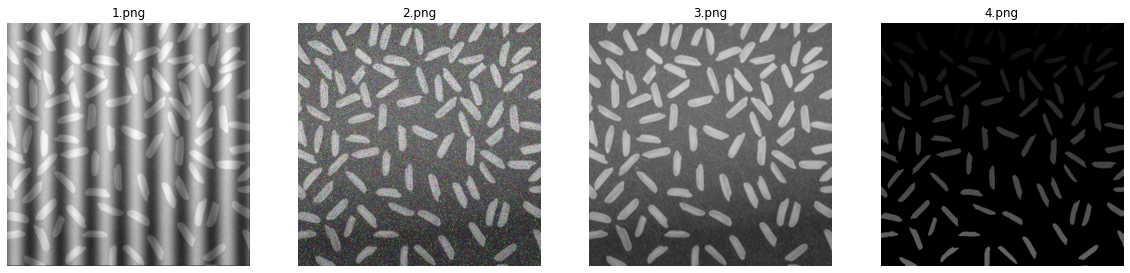

In [2]:
#view image
fig = plt.figure(figsize=(20,20))
for i in range(4):
    img = cv2.imread(os.path.join(path,files[i]))
    fig.add_subplot(1,4,i+1)
    plt.imshow(img)
    plt.title(files[i])
    plt.axis('off')


461 461


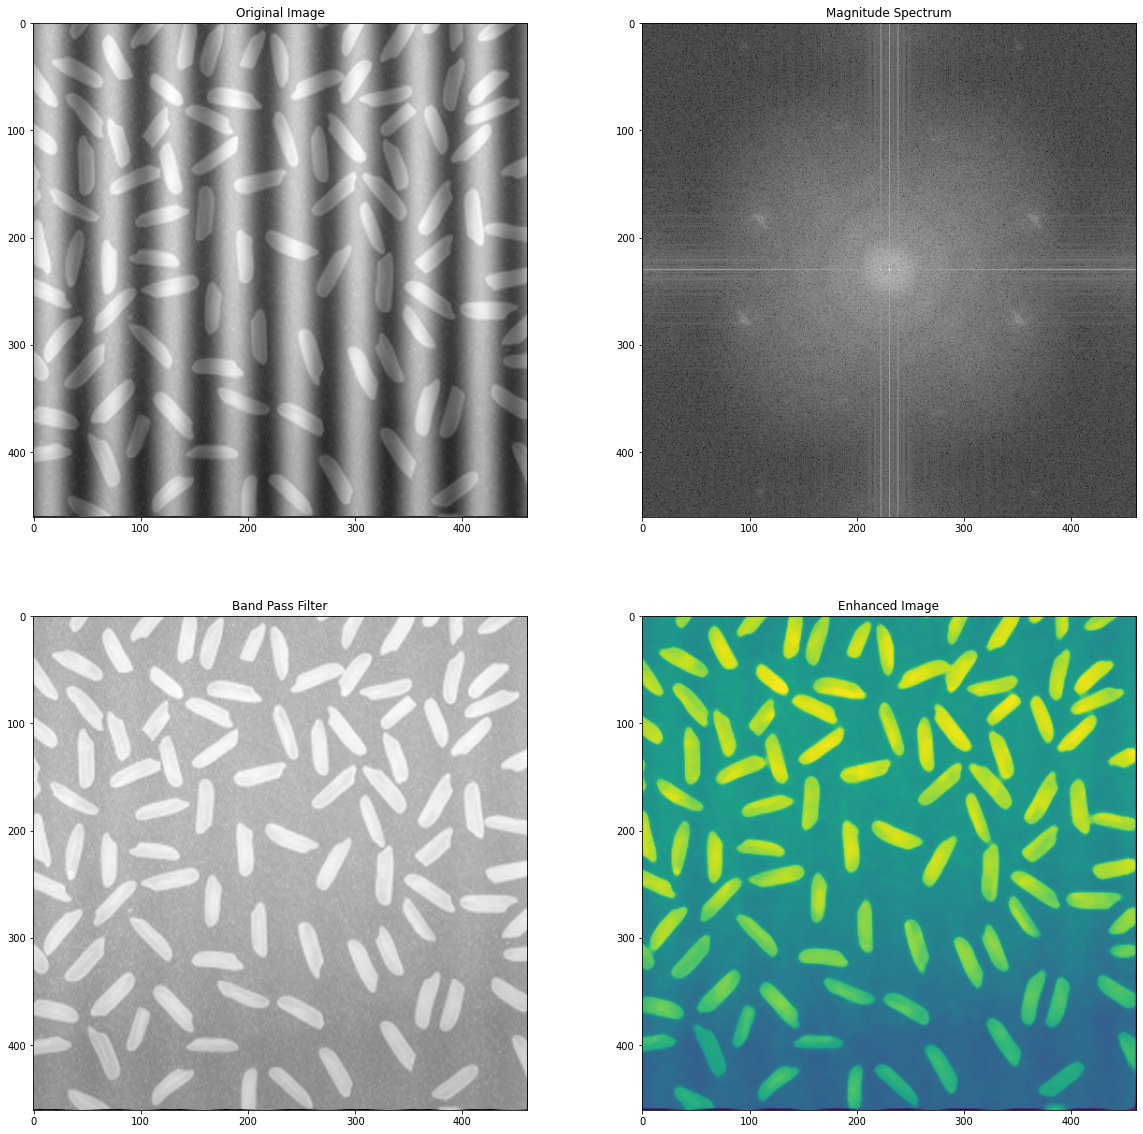

In [3]:
#1.PNG
img = cv2.imread(os.path.join(path,files[0]))
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
f = np.fft.fft2(img1)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 1+np.log(np.abs(fshift))

#band pass filter
def select_region(i,j,fshape0,fshape1,percentage):
    if i<fshape0/2+percentage*fshape0/2 and i>fshape0/2-percentage*fshape0/2 and j<fshape1/2+percentage*fshape1/2 and j>fshape1/2-percentage*fshape1/2:
        return False
    else:
        return True
def bandpass_filter(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    #find average value of fshift
    avg = np.mean(fshift)
    maxx = np.max(fshift)
    print(fshift.shape[0],fshift.shape[1])
    for i in range(fshift.shape[0]):
        for j in range(fshift.shape[1]):
            if select_region(i,j,fshift.shape[0],fshift.shape[1],1./100) and fshift[i,j]>maxx/100:
                fshift[i,j] = 0
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
img2 = bandpass_filter(img1)
#gamma correction
def gamma_correction(img,gamma):
    img = img/(255)
    img = img**(1/gamma)
    return img
def median_blur(img,ker):
    img1 = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img1[i,j] = np.median(img[i:i+ker,j:j+ker])
    return img1
img3 = gamma_correction(img2,0.5)
img3 = median_blur(img3,7)
fig = plt.figure(figsize=(20,20))
fig.add_subplot(2,2,1)
plt.imshow(img)
plt.title('Original Image')
fig.add_subplot(2,2,2)
plt.imshow(magnitude_spectrum,cmap= 'gray')
plt.title('Magnitude Spectrum')
fig.add_subplot(2,2,3)
plt.imshow(img2,cmap= 'gray')
plt.title('Band Pass Filter')
fig.add_subplot(2,2,4)
plt.imshow(img3)
plt.title('Enhanced Image')
array[0]=img3.copy()
array[0] = np.array(array[0]*255).astype('uint8')


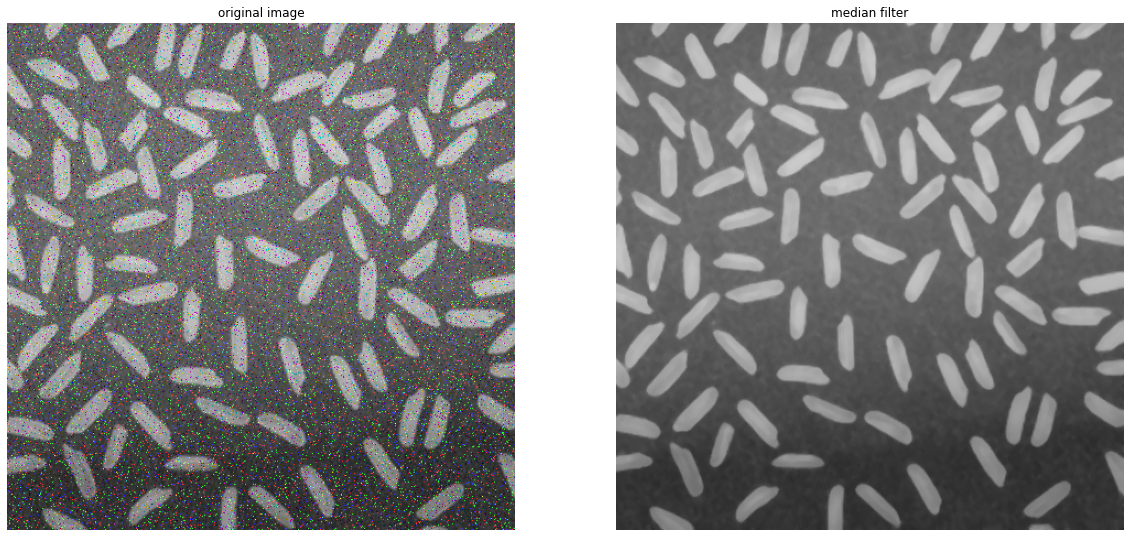

In [4]:
#2.PNG
#median filter
img = cv2.imread(os.path.join(path,files[1]))
def median_blur(img,ker):
    img1 = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img1[i,j] = np.median(img[i:i+ker,j:j+ker])
    return img1
img1 = median_blur(img,5)
#compare img vs img1
fig= plt.figure(figsize=(20,20))
fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('original image')
plt.axis('off')
fig.add_subplot(1,2,2)
plt.imshow(img1)
plt.title('median filter')
plt.axis('off')
array[1]=img1.copy()

In [5]:
#3.PNG
array[2]=cv2.blur(cv2.imread(os.path.join(path,files[2])), (5,5))

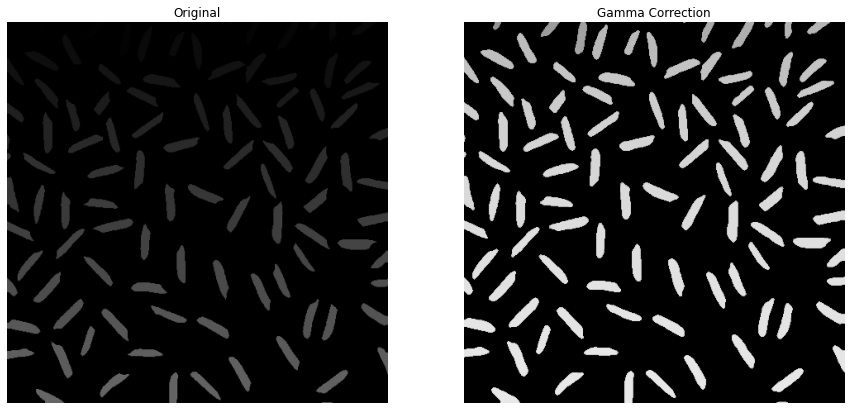

In [6]:
#4.PNG
#gamma correction
def gamma_correction(img,gamma):
    img = img/(255)
    img = img**(1/gamma)
    return img
def median_blur(img,ker):
    img1 = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img1[i,j] = np.median(img[i:i+ker,j:j+ker])
    return img1

img = cv2.imread(os.path.join(path,files[3]))
img1= gamma_correction(img,10)
img1 = median_blur(img1,5)
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')
fig.add_subplot(1,2,2)
plt.imshow(img1)
plt.title('Gamma Correction')
plt.axis('off')
array[3]=img1.copy()
array[3] = np.array(array[3]*255).astype('uint8')


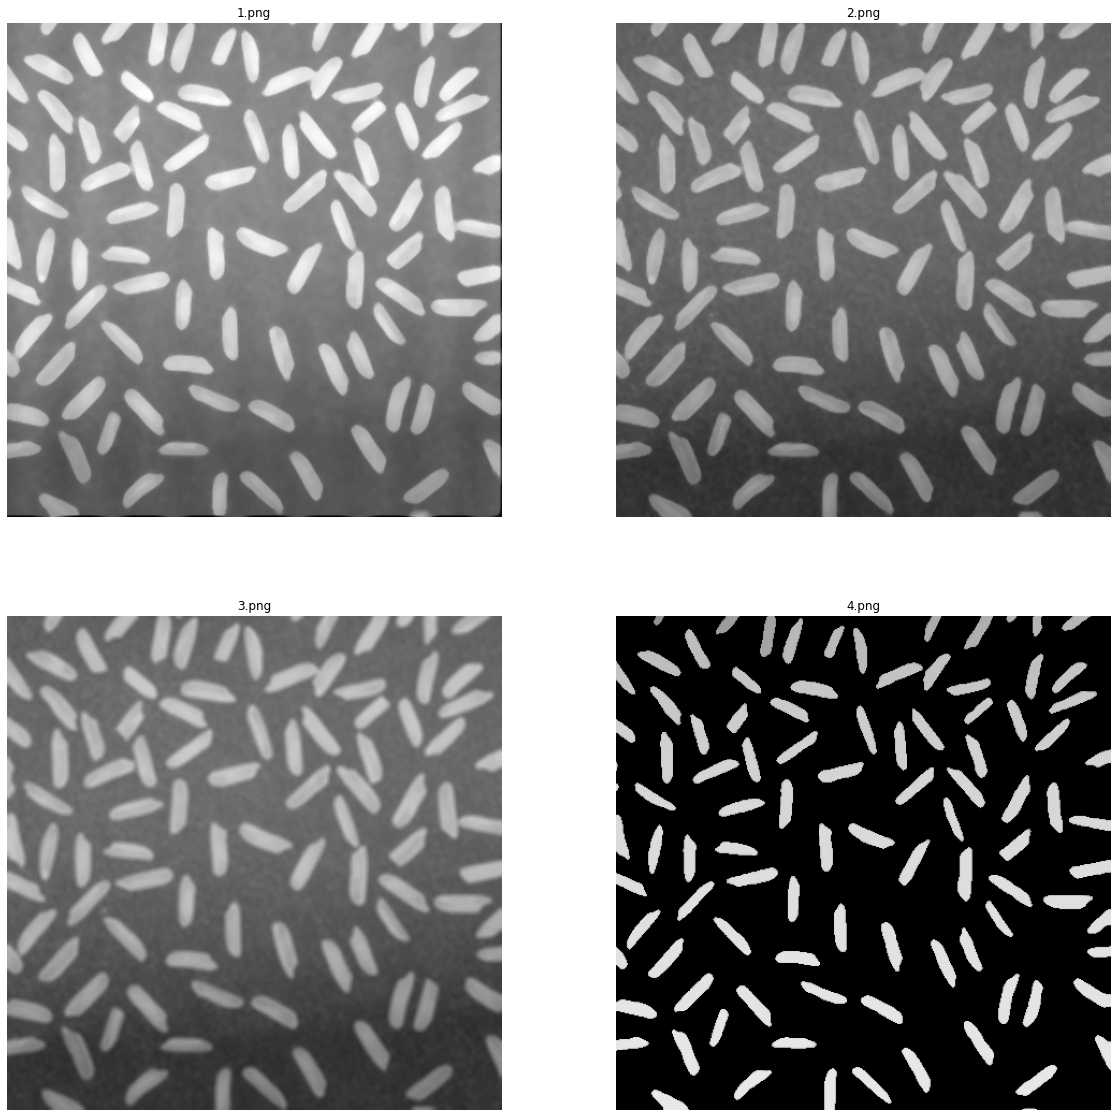

In [7]:
#show all images
fig = plt.figure(figsize=(20,20))
for i in range(4):
    fig.add_subplot(2,2,i+1)
    plt.imshow(array[i],cmap='gray')
    plt.title(files[i])
    plt.axis('off')
    

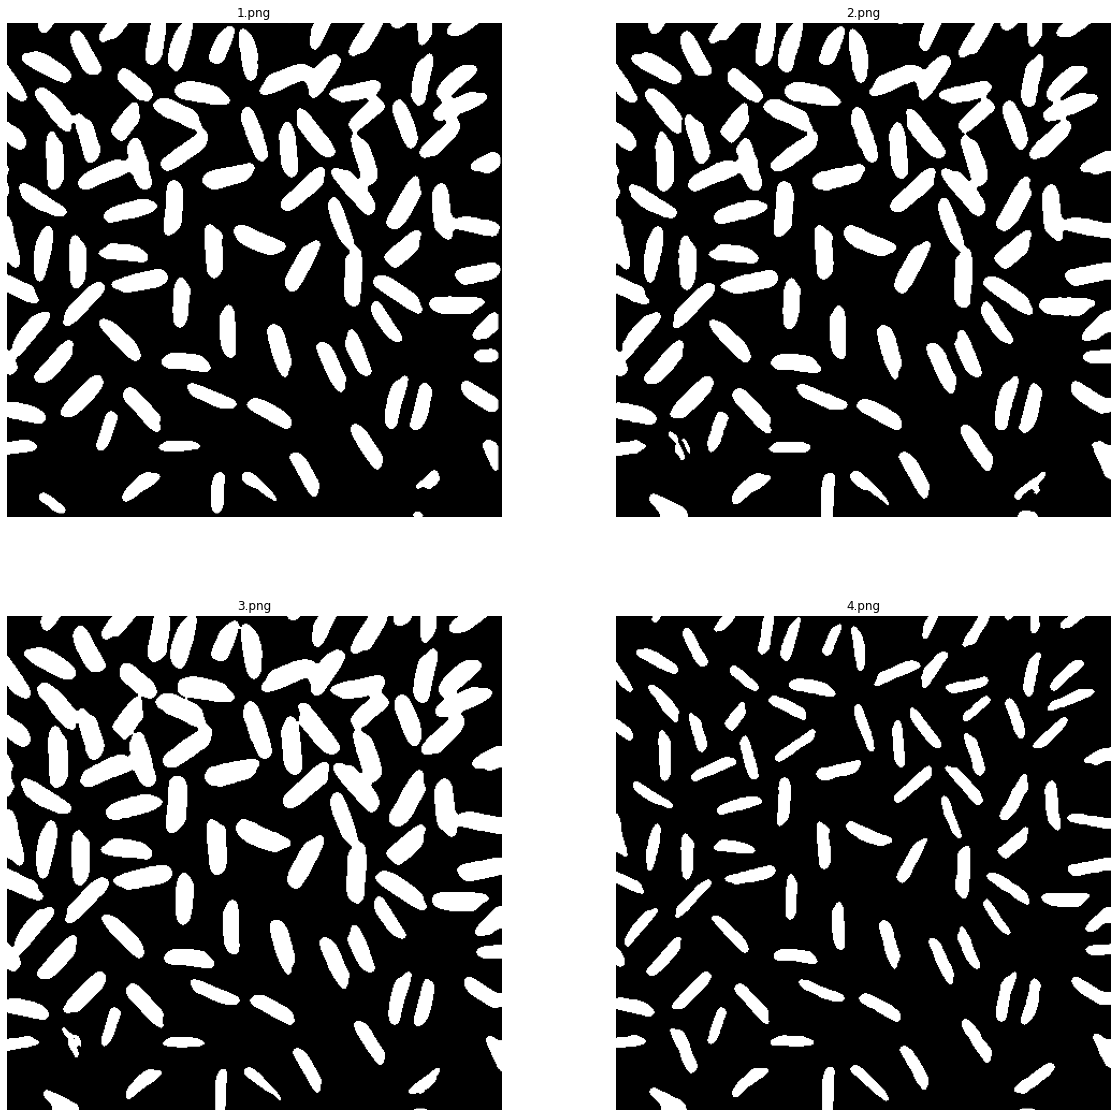

In [8]:
#convert to binary image
binary_images = np.empty(4, dtype=object)
for i in range(4):
    threshcut = np.max(array[i])*60/100
    ret,binary_images[i] = cv2.threshold(array[i],threshcut,255,cv2.THRESH_BINARY)
    binary_images[i] = median_blur(binary_images[i],5)

#show all images
fig = plt.figure(figsize=(20,20))
for i in range(4):
    fig.add_subplot(2,2,i+1)
    plt.imshow(binary_images[i],cmap='gray')
    plt.title(files[i])
    plt.axis('off')
    


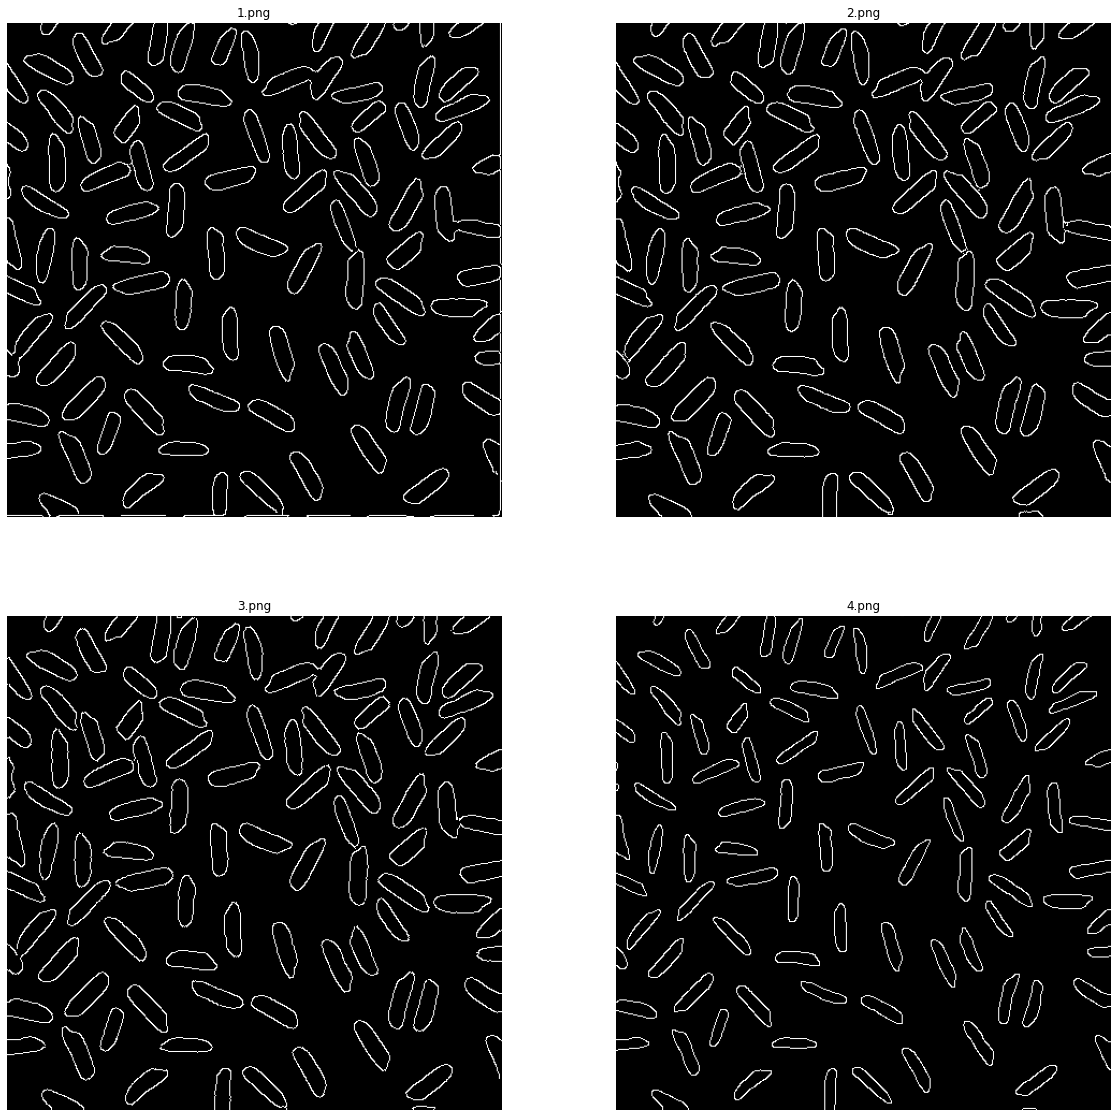

In [9]:
#edge detection using canny and count number of edges

fig = plt.figure(figsize=(20,20))
edge_detection = []
for i in range (4):
    canny_image = cv2.Canny(array[i].copy(),80,120)
    edge_detection.append(canny_image)
    fig.add_subplot(2,2,i+1)
    plt.imshow(canny_image, cmap='gray')
    plt.title(files[i])
    plt.axis('off')
    


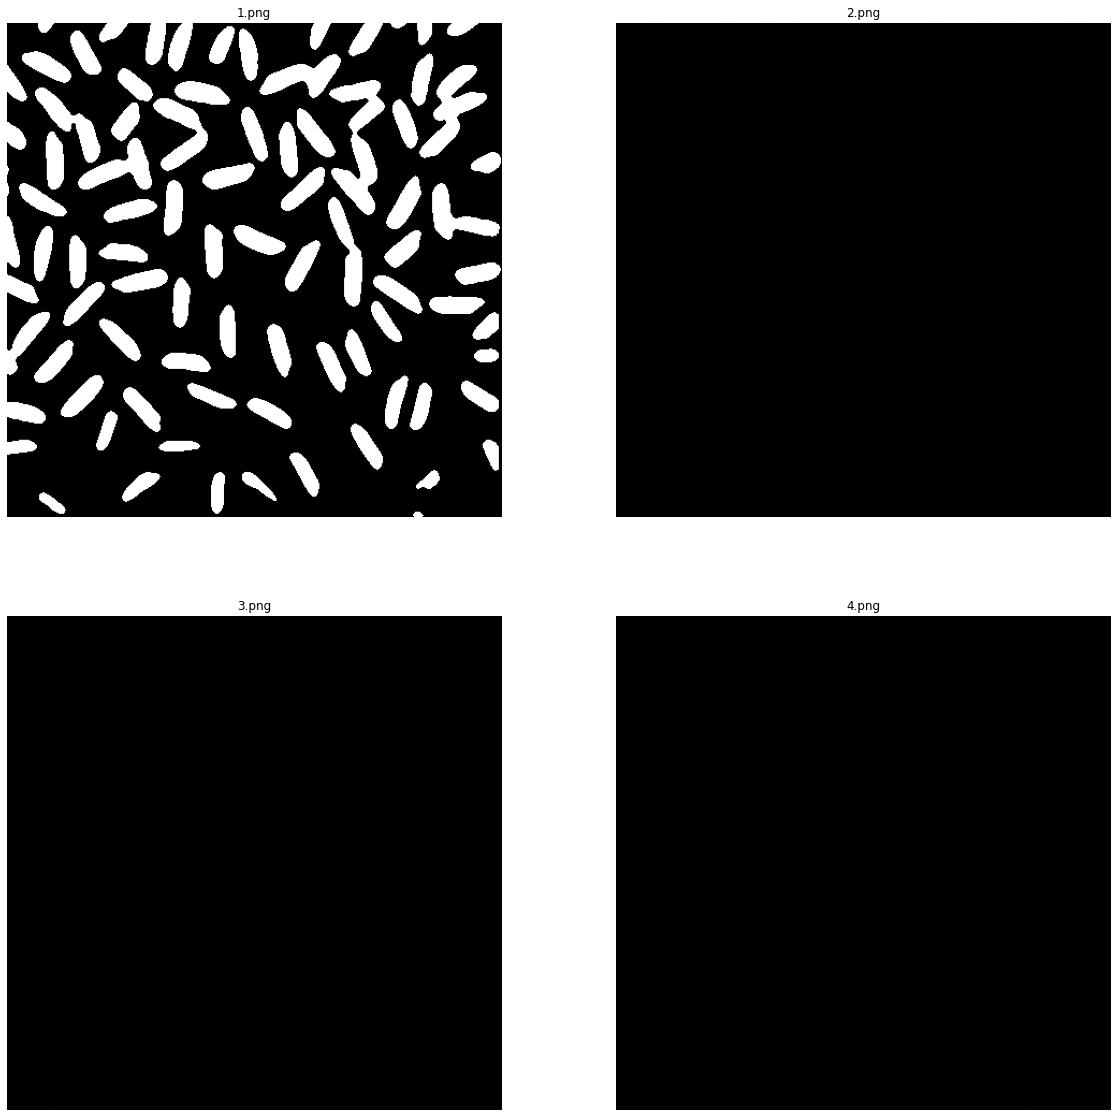

In [10]:
#erode and dilate
def erode(img,ker):
    img1 = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.sum(img[i:i+ker,j:j+ker]) == ker**2:
                img1[i,j] = 1
    return img1
def dilate(img,ker):
    img1 = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.sum(img[i:i+ker,j:j+ker]) > 0:
                img1[i,j] = 1
    return img1
def opening(img,ker1,ker2):
    img1 = erode(img,ker1)
    img1 = dilate(img1,ker2)
    return img1
def closing(img,ker1,ker2):
    img1 = dilate(img,ker1)
    img1 = erode(img1,ker2)
    return img1
#convert to binary
binary_edge = binary_images.copy()
fig = plt.figure(figsize=(20,20))
for i in range(4):
    fig.add_subplot(2,2,i+1)
    plt.imshow(dilate(binary_images[i],1),cmap='gray')
    plt.title(files[i])
    plt.axis('off')




In [11]:
#find contours and count number of contours if surface area > 100
def find_contours(img):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    count = 0
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 1:
            count += 1
    return count
for i in range(4):
    print(files[i],':',find_contours(edge_detection[i]))
    


1.png : 93
2.png : 97
3.png : 102
4.png : 97
